## 빅데이터 실습

### 다나와 무선청소기 상품분석

#### 데이터 수집

##### 셀레니움 사용
- 무선청소기 검색에 사용할 URL
    https://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&previousKeyword=무선청소기&checkedInfo=N&volumeType=allvs&page=1&limit=120&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&mode=simple&isInitTireSmartFinder=N&recommendedSort=N&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=3138&defaultVaTab=1098867&isZeroPrice=Y&quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A

    한페이지가 로드될때까지 5초정도 필요

In [3]:
## 필수 라이브러리 사용등록
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from urllib import parse
from tqdm import tqdm

In [5]:
## 웹드라이버로 크롬오픈
import time


driver = webdriver.Chrome()
url = r'https://search.danawa.com/dsearch.php?k1=%EC%97%90%EC%96%B4%EB%A9%94%EC%9D%B4%EB%93%9C+%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%83%80%EC%9B%8C&module=goods&act=dispMain'
driver.get(url)
time.sleep(5.0)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=122.0.6261.129)
Stacktrace:
	GetHandleVerifier [0x00007FF76992AD32+56930]
	(No symbol) [0x00007FF76989F632]
	(No symbol) [0x00007FF7697542E5]
	(No symbol) [0x00007FF769731D4C]
	(No symbol) [0x00007FF7697C23F7]
	(No symbol) [0x00007FF7697D7891]
	(No symbol) [0x00007FF7697BBA43]
	(No symbol) [0x00007FF76978D438]
	(No symbol) [0x00007FF76978E4D1]
	GetHandleVerifier [0x00007FF769CA6ABD+3709933]
	GetHandleVerifier [0x00007FF769CFFFFD+4075821]
	GetHandleVerifier [0x00007FF769CF818F+4043455]
	GetHandleVerifier [0x00007FF7699C9766+706710]
	(No symbol) [0x00007FF7698AB90F]
	(No symbol) [0x00007FF7698A6AF4]
	(No symbol) [0x00007FF7698A6C4C]
	(No symbol) [0x00007FF769896904]
	BaseThreadInitThunk [0x00007FFDAF027344+20]
	RtlUserThreadStart [0x00007FFDB04C26B1+33]


In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
soup

<html class="js no-touch" lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>에어메이드 스마트타워 : 다나와 통합검색</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="에어메이드 스마트타워 통합검색 : 다나와 통합검색" name="title"/>
<meta content="'에어메이드 스마트타워'의 다나와 통합검색 결과입니다." name="description"/>
<meta content="에어메이드 스마트타워, 다나와, 최저가, 가격비교, 검색, 통합검색, 상품 추천, 가격비교사이트, 가격비교 사이트, 가격비교 싸이트, 가격 검색, 추천, 인터넷쇼핑, 온라인쇼핑, 쇼핑, 쇼핑몰, 싸게 파는 곳, 지식쇼핑" name="keywords"/>
<meta content="에어메이드 스마트타워 통합검색 : 다나와 통합검색" property="og:title"/>
<meta content="'에어메이드 스마트타워'의 다나와 통합검색 결과입니다." property="og:description"/>
<meta content="https://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" property="og:image"/>
<meta content="width=1280" name="viewport"/>
<link href="//img.danawa.com/new/danawa_main/v1/img/danawa_favicon.ico" rel="shortcut icon"/>
<link href="//static.danawa.com/css/common.css?v=2402280851" rel="stylesheet" type="text

In [6]:
prodItems = soup.select('ul.product_list > li.prod_item')

In [1]:
len(prodItems)

NameError: name 'prodItems' is not defined

In [10]:
prodItems[0].select('p.prod_name > a')[0].text.strip()

'에어메이드 스마트타워 AMC-3501A'

In [11]:
# 제품스펙 가져오기
prodItems[0].select('div.spec_list')[0].text.strip().replace('\t', '')# 제품스펙 가져오기
prodItems[0].select('div.spec_list')[0].text.strip().replace('\t', '')

'핸디스틱청소기 / 무선 / 흡입형 / 흡입력: 370W / 2024년형 / [구성] 먼지비움 / 충전 / UVC LED / 브러쉬: 바닥 / 침구 / 솔형 / 틈새 / 먼지봉투: 2.5L / [배터리] 사용시간: 40분(최대) / 충전시간: 5시간 / 분리형(1개) / 2500mAh / [청소] LED라이트 / BLDC모터 / [부가] 디스플레이표시 / 헤파필터 / 색상: 화이트 / 무게: 2.5kg / 크기(가로x세로x깊이): 252x1253x185mm'

In [27]:
# 제품가격 가져오기
# 만약에 수가 아닌 문자열 들어왔을 때는 False
prodItems[0].select('input')[1].get('value').isdecimal()

True

##### 다나와 무선청소기 웹크롤링 다시
- 가격 외에는 안 들어오도록 변환

In [28]:
## 검색어, 페이지를 변경하면서 URL 생성함수
def getSearchPageUrl(keyword, page):
    ecKeyword = parse.quote(keyword)
    url = f'https://search.danawa.com/dsearch.php?query={ecKeyword}&originalQuery={ecKeyword}&previousKeyword={ecKeyword}&checkedInfo=N&volumeType=allvs&' + \
            f'page={page}&limit=120&sort=saveDESC&list=list&boost=true&tab=goods&addDelivery=N&coupangMemberSort=N&mode=simple&isInitTireSmartFinder=N&' + \
            'recommendedSort=N&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=3138&defaultVaTab=1098867&isZeroPrice=Y&' + \
            'quickProductYN=N&priceUnitSort=N&priceUnitSortOrder=A'
    return url

In [40]:
## 상품정보 추출하는 함수
def getProdItems(prodItem):
    prodData = []

    for prodItem in prodItems:
        try:
            prodName = prodItem.select('p.prod_name > a')[0].text.strip() # 상품명 가져오기
            specList = prodItem.select('div.spec_list')[0].text.strip().replace('\t', '') # 상품 정보 가져오기
            if prodItem.select('input')[1].get('value').isdecimal() == True:
                price = prodItem.select('input')[1].get('value') # 최저가 가져오기
            else:
                price = 0 # 문자열 들어온 것 막음
            
            prodData.append([prodName, specList, price])
            
        except:
            pass
    return prodData

In [41]:
## 여러 페이지 검색 후 크롤링 하는 작업
driver = webdriver.Chrome()
# 암묵적으로 웹 자원 로드를 위해 3초 정도 대기
driver.implicitly_wait(3.0)

keyword = '무선청소기'
startPage = 1
totalPage = 20
prodDataTotal = [] # 최종적으로 저장할 리스트

for page in tqdm(range(startPage, totalPage+1)):
    # 검색 페이지 이동
    url = getSearchPageUrl(keyword, page)
    driver.get(url)
    # 페이지 로딩이 완료될 때까지 5초간 대기
    time.sleep(5.0)

    # 현재 페이지 HTML 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 상품정보 추출
    prodItems = soup.select('ul.product_list > li.prod_item')
    prodItemList =getProdItems(prodItems) # 리스트로 추출하는 함수

    # 추출된 정보를 prodDataTotal 추가
    prodDataTotal += prodItemList


100%|██████████| 20/20 [03:48<00:00, 11.44s/it]


In [42]:
dfProdDataTotal = pd.DataFrame(prodDataTotal)

In [34]:
dfProdDataTotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2120 non-null   object
 1   1       2120 non-null   object
 2   2       2120 non-null   object
dtypes: object(3)
memory usage: 49.8+ KB


In [43]:
dfProdDataTotal.columns=['제품명', '제품스펙', '최저가']

In [44]:
dfProdDataTotal.to_excel('./data/다나와_무선청소기_결과.xlsx', index= False)

##### 크롤링 데이터 전처리

In [97]:
# 저장한 엑셀을 재로드
dfProdDanawa = pd.read_excel('./data/다나와_무선청소기_결과.xlsx')
dfProdDanawa.tail()

,제품명,제품스펙,최저가
2115,미니센 무선 소형 청소기 MNC-100 먼지통,차량용청소기 / 먼지통,7000
2116,프리라벨 2in1 무선 진공 청소기 LS-2000 헤파필터,차량용청소기 / 필터 / [필터] 헤파필터,3500
2117,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0
2118,포쉬 워시젯 V2 WJ200,침구청소기 / 핸디형 / 무선 / 사용시간: 25분(최대) / [기능] 청소모드: ...,219000
2119,업킵 MJ-BC779,침구청소기 / 핸디형 / 무선 / [기능] 청소모드: UV살균 / 속도조절 / 헤파...,89900


In [49]:
dfProdDanawa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     2120 non-null   object
 1   제품스펙    2110 non-null   object
 2   최저가     2120 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.8+ KB


In [98]:
# 결측치 검색
condition = dfProdDanawa['제품스펙'].isnull() == True

In [58]:
dfProdDanawa[condition]

,제품명,제품스펙,최저가
1846,스팀청소기 샤오미 무선 휴대용 자동차 진공 청소기 스마트 홈 흡입 및 블로잉 다기능...,NaN,0
1861,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0
1910,스팀청소기 샤오미 무선 휴대용 자동차 진공 청소기 스마트 홈 흡입 및 블로잉 다기능...,NaN,0
1925,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0
1974,스팀청소기 샤오미 무선 휴대용 자동차 진공 청소기 스마트 홈 흡입 및 블로잉 다기능...,NaN,0
1989,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0
2038,스팀청소기 샤오미 무선 휴대용 자동차 진공 청소기 스마트 홈 흡입 및 블로잉 다기능...,NaN,0
2053,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0
2102,스팀청소기 샤오미 무선 휴대용 자동차 진공 청소기 스마트 홈 흡입 및 블로잉 다기능...,NaN,0
2117,상품상세설명 참조 캐치웰 텀블러 디자인 초경량 무선 핸디형 진공청소기_아이언그레이,NaN,0


In [99]:
## 결측치가 있는 행(row)을 삭제
dfProdDanawa = dfProdDanawa.dropna(axis=0)

In [100]:
## 최저가가 0인 제품
condition = dfProdDanawa['최저가']== 0

In [101]:
# 최저가가 0인 제품을 제외한 나머지
dfProdDanawa = dfProdDanawa[condition == False]

In [102]:
# 행들이 삭제되면서 인덱스가 꼬임. 인덱스 초기화
dfProdDanawa.reset_index(drop=True, inplace= True)

In [104]:
# 결측치, 이상치를 제거한 최종DF
# 회사명, 모델명, 카테고리, 사용시가느 흡입력 추출한 결과도 2057개
dfProdDanawa

,제품명,제품스펙,최저가
0,LG전자 오브제컬렉션 코드제로 A9S AX9884,핸디스틱청소기 / 무선 / 흡입+물걸레(동시) / 흡입력: 250W / 소비전력: ...,873560
1,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기 / 무선 / 흡입형 / 흡입력: 220W / 2022년형 / [구성]...,446390
2,샤오미 미홀 M22,핸디스틱청소기 / 무선 / 흡입형 / 소비전력: 320W / 2023년형 / [구성...,151050
3,LG전자 오브제컬렉션 코드제로 A9S AX9604,핸디스틱청소기 / 무선 / 흡입형 / 흡입력: 250W / 소비전력: 620W / ...,715570
4,LG전자 오브제컬렉션 코드제로 A9S AX9988,핸디스틱청소기 / 무선 / 흡입+물걸레(동시) / 흡입력: 280W / 소비전력: ...,1229240
...,...,...,...
2052,미니센 무선 소형 청소기 MNC-100 노즐 세트,차량용청소기 / 전용브러쉬,7000
2053,미니센 무선 소형 청소기 MNC-100 먼지통,차량용청소기 / 먼지통,7000
2054,프리라벨 2in1 무선 진공 청소기 LS-2000 헤파필터,차량용청소기 / 필터 / [필터] 헤파필터,3500
2055,포쉬 워시젯 V2 WJ200,침구청소기 / 핸디형 / 무선 / 사용시간: 25분(최대) / [기능] 청소모드: ...,219000


In [77]:
dfProdDanawa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     2057 non-null   object
 1   제품스펙    2057 non-null   object
 2   최저가     2057 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 48.3+ KB


In [105]:
# 회사명, 제품명 분리 split(' ', n) n => 자를 공백의 번호
dfProdDanawa['제품명'][:5][0].split(' ', 1)

['LG전자', '오브제컬렉션 코드제로 A9S AX9884']

In [106]:
## 회사명, 모델명 분리시작
compList = []
modelList = []
count = 0

for temp in dfProdDanawa['제품명']:
    titles = temp.split(' ', 1) # 길이 2 배열 생성
    if (len(titles) > 1):
        compList.append(titles[0]) # 회사명
        modelList.append(titles[1]) # 모델명
    else:
        compList.append('') # 회사명
        modelList.append(titles[0]) # 모델명
    count += 1

In [107]:
len(compList)

2057

In [104]:
len(modelList)

2057

In [108]:
# 스펙목록 데이터
specList = dfProdDanawa.loc[1, '제품스펙'].split(' / ')

In [111]:
specList

['핸디스틱청소기',
 '무선',
 '흡입+물걸레(동시)',
 '흡입력: 250W',
 '소비전력: 620W',
 '2023년형',
 '[구성] 거치대: 올인원타워',
 '먼지비움',
 '충전',
 'UVC LED',
 '액서서리수납',
 '스탠드거치',
 '먼지비움시간: 30초',
 '브러쉬: 와이드바닥',
 '물걸레: 스팀, 고온, 일반',
 '솔형',
 '틈새',
 '먼지봉투: 2.5L',
 '[배터리] 사용시간: 30분(최대)',
 '충전시간: 4시간',
 '분리형(2개)',
 '리튬이온',
 '25.2V',
 '[청소] 싸이클론흡입',
 'LED라이트',
 '자동물공급',
 '스마트인버터모터',
 '[부가] 스마트폰제어',
 '대화형알림창',
 '워셔블헤파필터',
 '5단계여과',
 '색상: 카밍베이지',
 '무게: 2.47kg',
 '크기(가로x세로x깊이): 300x1120x245mm']

In [109]:
useTime = ''
suctionPow = ''

for spec in specList:
    if '사용시간' in spec:
        useTime = spec
    elif '흡입력' in spec:
        suctionPow = spec
print(useTime.split(':')[1].strip())
print(suctionPow(':')[1].strip()) # 흡입력이 없어서 ''인 경우는 split(':')에서 예외 발생

1시간(최대)


TypeError: 'str' object is not callable

In [125]:
dfProdDanawa.loc[1356]

제품명                       샤오미 LYDSTO 차량용 무선 청소기 H2 (해외구매)
제품스펙    차량용청소기 / 무선 / [흡입력] 16,000Pa / [최대출력] 120W / [...
최저가                                                 34760
Name: 1356, dtype: object

In [110]:
## 위의 테스트를 기반으로 카테고리, 사용시간, 흡입력 추출
categoryList = []
useTimeList = []
suctionPowList = []
count = 0

for spec in dfProdDanawa['제품스펙']:
    # ' / ' 로 문자열 분리
    specList = spec.split(' / ')
    # 카테고리 추출
    category = specList[0]
    categoryList.append(category)
    # 사용시간, 흡입력 추출
    useTimeVal = None
    suctionPowVal = None

    for temp in specList:
        if '사용시간' in temp:
            useTimeVal = temp.replace('[배터리] ', '') # [배터리] 가 값 오류 발생시킴
        elif '흡입력' in temp:
            suctionPowVal = temp

    # 끝난 다음에도 사용시간, 흡입력이 None이면 스펙에 찾을 값이 없었음
    if useTimeVal != None:
        useTime = useTimeVal.split(' ')[1].strip().replace('(최대)', '') # (최대) 삭제
    else :
        useTime = ''

    if suctionPowVal != None:
        suctionPow = suctionPowVal.split(' ')[1].strip()
    else:
        suctionPow = ''

    # print(useTimeVal)
    useTimeList.append(useTime)
    suctionPowList.append(suctionPow)
    count += 1
    # print(count)

In [111]:
len(categoryList)

2057

In [163]:
len(useTimeList)

2057

In [164]:
len(suctionPowList)

2057

In [112]:
useTimeList

['30분',
 '1시간',
 '',
 '30분',
 '1시간',
 '1시간',
 '30분',
 '1시간',
 '50분',
 '50분',
 '1시간30분',
 '1시간',
 '30분',
 '50분',
 '1시간',
 '12분',
 '30분',
 '1시간',
 '1시간',
 '1시간20분',
 '1시간',
 '1시간',
 '30분',
 '1시간',
 '1시간',
 '30분',
 '43분',
 '43분',
 '1시간',
 '1시간',
 '40분',
 '53분',
 '40분',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '50분',
 '20분',
 '10~15분',
 '1시간',
 '1시간',
 '30분',
 '30분',
 '45분',
 '',
 '18분',
 '1시간',
 '1시간',
 '30분',
 '40분',
 '42분',
 '1시간',
 '50분',
 '1시간',
 '50분',
 '30분',
 '60분',
 '30분',
 '32분',
 '1시간',
 '1시간',
 '30분',
 '30분',
 '1시간40분',
 '1시간',
 '1시간',
 '30분',
 '1시간',
 '1시간20분',
 '1시간',
 '1시간',
 '30분',
 '30분',
 '30분',
 '1시간',
 '40분',
 '30분',
 '40분',
 '30분',
 '30분',
 '30분',
 '30분',
 '1시간',
 '30분',
 '1시간',
 '',
 '57분',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '1시간',
 '35분',
 '20분',
 '50분',
 '40분',
 '45분',
 '45분',
 '30분',
 '40분',
 '1시간20분(대용량배터리기준)',
 '20분',
 '40분',
 '40분',
 '',
 '40분',
 '45분',
 '50분',
 '42분',
 '1시간',
 '1시간',
 '20분',
 '1시간',
 '28분',
 '20분',
 '50분',
 '1시간10분',
 '',
 '1시간',
 '1시간',


In [165]:
suctionPowList

['250W',
 '220W',
 '',
 '250W',
 '280W',
 '220W',
 '250W',
 '210W',
 '160W',
 '150W',
 '25000Pa',
 '250W',
 '9000Pa',
 '40000Pa',
 '220W',
 '',
 '280W',
 '151AW',
 '240AW',
 '280W',
 '220W',
 '220W',
 '',
 '115AW',
 '220W',
 '250W',
 '17000Pa',
 '17000Pa',
 '250W',
 '220W',
 '200W',
 '',
 '15000Pa',
 '130AW',
 '220W',
 '22000Pa',
 '',
 '35000Pa',
 '60W',
 '',
 '25000Pa',
 '220W',
 '',
 '250W',
 '',
 '',
 '22000Pa',
 '200W',
 '140AW',
 '250W',
 '12000Pa',
 '',
 '220W',
 '',
 '210W',
 '35000Pa',
 '250W',
 '',
 '280W',
 '23000Pa',
 '140AW',
 '27000Pa',
 '250W',
 '250W',
 '280W',
 '210W',
 '220W',
 '250W',
 '220W',
 '280W',
 '220W',
 '150AW',
 '250W',
 '250W',
 '250W',
 '240AW',
 '100AW',
 '',
 '200W',
 '250W',
 '250W',
 '280W',
 '250W',
 '220W',
 '250W',
 '220W',
 '9000Pa',
 '',
 '220W',
 '17000Pa',
 '',
 '151AW',
 '210W',
 '200AW',
 '220W',
 '12000Pa',
 '',
 '23000Pa',
 '',
 '23000Pa',
 '',
 '10000Pa',
 '35000Pa',
 '310W',
 '50AW',
 '12000Pa',
 '42000Pa',
 '',
 '150W',
 '',
 '20000Pa',
 

In [172]:
time = '1시간 30분'
time.split('시간')[-1].split('분')[0]

' 30'

In [113]:
## 사용시단 단위를 통일
# time = '1시간', '30분', '1시간20분'
def convertHourToMin(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [178]:
convertHourToMin('35분')

35

In [114]:
newUseTimeList = []
for time in useTimeList:
    value = convertHourToMin(time)
    newUseTimeList.append(value)

In [182]:
len(newUseTimeList)

2057

In [115]:
## 흡입력 단위 통일 1W = 1AW = 100Pa
def convertPow(value):
    try:
        value.upper()

        if 'AW' in value or 'W' in value:
            result = value.replace('A', '').replace('W', '').replace(',', '') #A, W, 1000단위 쉼표 삭제
            result = int(result)
        elif 'PA' in value:
            result = value.replace('PA', '').replace(',', '') #PA, 1000단위 쉼표 삭제
            result = int(result) // 100
        else:
            result = None
        return result
    except:
        return None

In [116]:
newSuctionList = []
for power in suctionPowList:
    value = convertPow(power)
    newSuctionList.append(value)


In [193]:
len(newSuctionList)

2057

In [117]:
# 최종 데이터 엑셀 저장
dfLast = pd.DataFrame()
dfLast['카테고리'] = categoryList
dfLast['회사명'] = compList
dfLast['제품명'] = modelList
dfLast['가격'] = dfProdDanawa['최저가']
dfLast['사용시간'] = newUseTimeList
dfLast['흡입력'] = newSuctionList

In [118]:
dfLast.to_excel('./data/다나와_무선청소기_전처리결과.xlsx', index=False)

##### 무선청소기 분석 전 결측치 제거

In [155]:
dfCleaner = pd.read_excel('./data/다나와_무선청소기_전처리결과.xlsx')

In [156]:
dfCleaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    2057 non-null   object 
 1   회사명     2039 non-null   object 
 2   제품명     2057 non-null   object 
 3   가격      2057 non-null   int64  
 4   사용시간    1656 non-null   float64
 5   흡입력     382 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.6+ KB


In [122]:
# 회사명 빠진 조건
condition = dfCleaner['회사명'].isnull() == True

In [124]:
## 회사명 빠진 것 직접 수동으로 채워넣음
dfCleaner[condition]

,카테고리,회사명,제품명,가격,사용시간,흡입력
289,핸디스틱청소기,0,LT-124,29980,240.0,0.0
998,탁상용청소기,0,KKGTL,19800,0.0,0.0
1013,핸디스틱청소기,0,브라프,98000,20.0,0.0
1020,창문청소기,0,YLW6305D,26310,30.0,0.0
1042,핸디스틱청소기,0,홈룸,72350,25.0,0.0
1238,핸디스틱청소기,0,ZEK-K8,157640,0.0,0.0
1292,탁상용청소기,0,티후,5400,0.0,0.0
1310,핸디스틱청소기,0,ZC1018,89900,25.0,0.0
1319,핸디스틱청소기,0,SC-100,69800,30.0,0.0
1518,침구청소기,0,JK300,21890,20.0,0.0


In [123]:
# 사용시간, 흡입력 NaN인 것은 전부 0으로 채워넣기
dfCleaner = dfCleaner.fillna(0)

In [153]:
dfCleaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    2057 non-null   object 
 1   회사명     2057 non-null   object 
 2   제품명     2057 non-null   object 
 3   가격      2057 non-null   int64  
 4   사용시간    2057 non-null   float64
 5   흡입력     2057 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 96.6+ KB


##### 필요제품 선별

In [125]:
# 카테고리 별 제품개수 -> 워드클라우드
dfCleaner['카테고리'].value_counts()

카테고리
핸디스틱청소기                1126
차량용청소기                  304
물걸레청소기                  217
침구청소기                    90
욕실청소기                    81
업소용청소기                   58
탁상용청소기                   52
핸디스틱청소기+로봇청소기            34
스틱청소기                    27
진공청소기                    18
창문청소기                    11
수영장청소기                   10
스팀청소기                     5
로봇청소기                     5
핸디/스틱청소기+핸디/스틱청소기         4
카펫소파청소기                   4
핸디스틱청소기+공기청정기세트           4
욕실+물걸레청소기                 1
핸디스틱청소기+핸디스틱청소기세트         1
핸디스틱청소기+가습기세트             1
핸디스틱청소기+공기청정기+가습기세트       1
신발세척기                     1
차량용선풍기                    1
핸디스틱청소기+물걸레청소기세트          1
Name: count, dtype: int64

In [33]:
dfCleaner['회사명'].value_counts()

회사명
삼성전자       144
LG전자       131
신일전자        88
다이슨         75
일렉트로룩스      66
          ... 
에이치앤오        1
아이리          1
이나프          1
다기능          1
YINCHEN      1
Name: count, Length: 519, dtype: int64

In [126]:
## 핸드스틱 청소기만 선택해서 분석
dfDataFinal = dfCleaner[dfCleaner['카테고리'].isin(['핸디스틱청소기', '핸디스틱청소기+로봇청소기', '스틱청소기', '진공청소기'])]

In [127]:
dfDataFinal.to_excel('./data/2_danawa_data_final.xlsx', index= False)

##### 분석용 재로드

In [128]:
dfDataFinal = pd.read_excel('./data/2_danawa_data_final.xlsx')

In [129]:
dfDataFinal.tail()

,카테고리,회사명,제품명,가격,사용시간,흡입력
1200,진공청소기,LG전자,코드제로 T9 T960D,1523960,0,250
1201,진공청소기,LG전자,코드제로 싸이킹 K95,1359230,40,0
1202,진공청소기,마끼다,DCL501,761200,0,0
1203,진공청소기,LG전자,코드제로 T9 T960D,1523960,0,250
1204,진공청소기,LG전자,코드제로 싸이킹 K95,1359230,40,0


In [130]:
# 흡입력 기준으로 정렬, ascending= True(오름차순), ascending= False(내림차순)
suctionTopList  = dfDataFinal.sort_values(['흡입력'], ascending= False)
suctionTopList.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
118,핸디스틱청소기,신일전자,SVC-S380IM,249000,0,380
296,핸디스틱청소기,하나인더스트리,하우리즈 NS-WVCC03,198000,50,380
133,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,197000,45,370
131,핸디스틱청소기,캐치웰,에이센스 VC234 MJ35-7S20,152100,50,350
181,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX958A,1628900,30,320


In [131]:
# 사용시간 기준 정렬
useTimeTopList = dfDataFinal.sort_values(['사용시간', '흡입력'], ascending= False)
useTimeTopList.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
277,핸디스틱청소기,0,LT-124,29980,240,0
830,핸디스틱청소기,기펠,BTS-5000,471980,240,0
1020,핸디스틱청소기,라이녹스,원큐 RXBC-C200,174830,240,0
382,핸디스틱청소기,헤몬,ST-6655,39010,180,0
663,핸디스틱청소기,무궁화전자,바로바로 MDC-910,225460,150,0


In [132]:
# 사용시간, 흡입력 동시에 기준 정렬
topList = dfDataFinal.sort_values(['사용시간', '흡입력'], ascending=False)
topList.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
277,핸디스틱청소기,0,LT-124,29980,240,0
830,핸디스틱청소기,기펠,BTS-5000,471980,240,0
1020,핸디스틱청소기,라이녹스,원큐 RXBC-C200,174830,240,0
382,핸디스틱청소기,헤몬,ST-6655,39010,180,0
663,핸디스틱청소기,무궁화전자,바로바로 MDC-910,225460,150,0


In [133]:
## 가성비 좋은 제품 찾기 전
# 평균값
priceMean = int(dfDataFinal['가격'].mean())
suctionMean = dfDataFinal['흡입력'].mean()
useTimeMean = dfDataFinal['사용시간'].mean()
print(f'평균가격 : {priceMean:,d}원, 평균흡입력 : {suctionMean:,.2f}W, 평균사용시간 : {useTimeMean:,.2f}분')


평균가격 : 469,663원, 평균흡입력 : 54.40W, 평균사용시간 : 39.51분


In [134]:
## 가성비 좋은 제품
cond1 = dfDataFinal['가격'] <= priceMean
cond2 = dfDataFinal['흡입력'] >= suctionMean
cond3 = dfDataFinal['사용시간'] >= useTimeMean


In [135]:
## 가성비 좋은 제품 검색
chartData = dfDataFinal[cond1 & cond2 & cond3]

##### 데이터 시각화

In [136]:
# 필요 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path  = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [151]:
## 흡입력, 사용시간 최대값, 최솟값
suctionMax = chartData['흡입력'].max()
useTimeMax = chartData['사용시간'].max()
suctionMean2 = chartData['흡입력'].mean()
useTimeMean2 = chartData['사용시간'].mean()

53.78787878787879

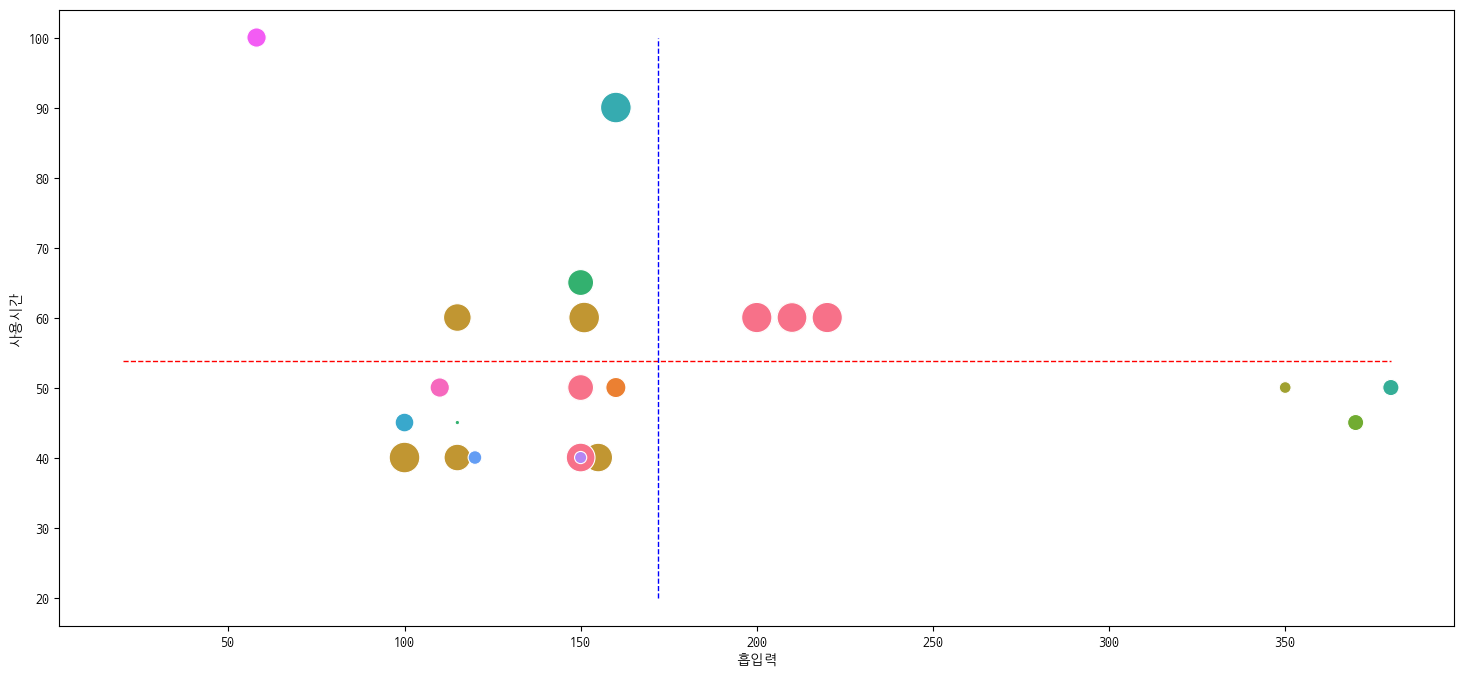

In [152]:
plt.figure(figsize=(18,8))
sns.scatterplot(data= chartData, x='흡입력', y= '사용시간', size= '가격', sizes= (10, 500), hue= chartData['회사명'], legend= False)
plt.plot([20,suctionMax], [useTimeMean2, useTimeMean2], 'r--', lw=1) # 사용시간 평균치 줄 표시
plt.plot([suctionMean2, suctionMean2], [20,useTimeMax], 'b--', lw=1)

plt.show()

In [157]:
## 인기제품 데이터 시각화
chartDataTop = chartData[:20]

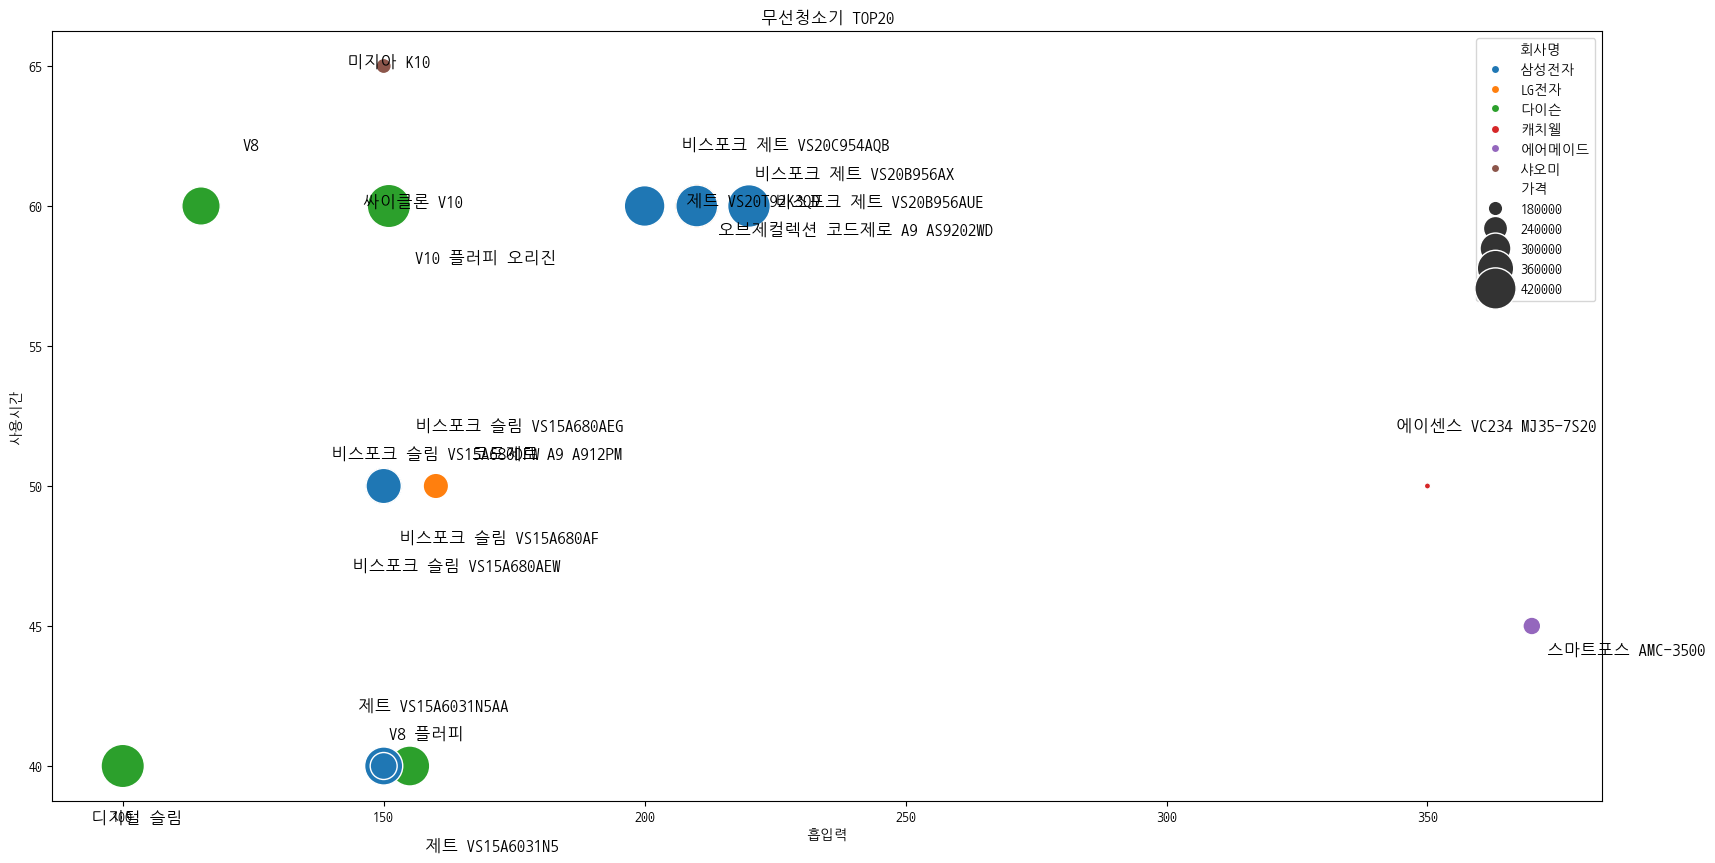

In [168]:
import random
# 인기제품 시각화
fig = plt.figure(figsize=(20, 10))
plt.title('무선청소기 TOP20')
sns.scatterplot(data=chartDataTop, x='흡입력', y='사용시간', size='가격', sizes=(20,1000),
                hue=chartDataTop['회사명'])

for index, row in chartDataTop.iterrows():
    x =row['흡입력'] + random.randrange(-10,10)
    y = row['사용시간'] + random.randrange(-3,3)
    s = row['제품명']
    plt.text(x,y,s, size=12)

plt.show()

##### 결론
- 데이터 분석을 위한 전처리는 쉽지않음
- 결과들이 예상이나, 실제와 다를 수 있음